In [1]:
# Compare along-fjord properties in different cases
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gsw
import cmocean
import Functions as fun
import os, sys

In [2]:
path = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_S/'
taum = np.array([0, 0.1, 0.3, -0.1, -0.3])
caseid = [1,2,4]

Temp = []
S = []
U = []
for i in caseid:
    dist, depth, time, temp, sal, den, u, w = fun.along_fjord_state(path,i)
    Temp.append(temp)
    S.append(sal)
    U.append(u)

t0 = 6 # Day 61.5

T_nw, S_nw, U_nw = Temp[0][t0,:,:], S[0][t0,:,:], U[0][t0,:,:]
T_dw, S_dw, U_dw = Temp[1][t0,:,:], S[1][t0,:,:], U[1][t0,:,:]
T_uw, S_uw, U_uw = Temp[2][t0,:,:], S[2][t0,:,:], U[2][t0,:,:]

# Mask for topography
mask = (S_nw==0)
T_nw[mask] = np.nan
T_dw[mask] = np.nan
T_uw[mask] = np.nan
S_nw[mask] = np.nan
S_dw[mask] = np.nan
S_uw[mask] = np.nan
U_nw[mask] = np.nan
U_dw[mask] = np.nan
U_uw[mask] = np.nan

# Divergence between wind and no-wind case
dT_dw = T_dw - T_nw
dT_uw = T_uw - T_nw
dS_dw = S_dw - S_nw
dS_uw = S_uw - S_nw
dU_dw = U_dw - U_nw
dU_uw = U_uw - U_nw



In [ ]:
#time/86400
#np.nanmax(T_nw), np.nanmin(T_nw), np.nanmax(T_dw), np.nanmin(T_dw), np.nanmax(T_uw), np.nanmin(T_uw)
np.nanmax(S_nw), np.nanmin(S_nw), np.nanmax(S_dw), np.nanmin(S_dw), np.nanmax(S_uw), np.nanmin(S_uw)
#np.nanmax(U_nw), np.nanmin(U_nw), np.nanmax(U_dw), np.nanmin(U_dw), np.nanmax(U_uw), np.nanmin(U_uw)

In [ ]:
dist

In [ ]:
#np.linspace(-0.5,0.5,21)
np.linspace(23,32,21)
np.linspace(5,9,21)

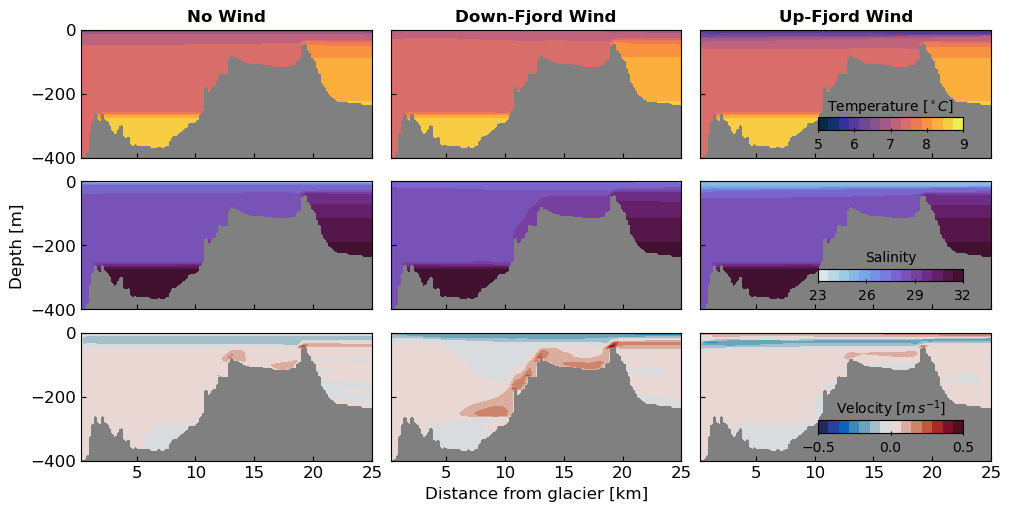

In [14]:

fig0, axs = plt.subplots(3,3, sharex=True, sharey=True, constrained_layout=True, figsize=(10,5))
# Contour range
cr_u = np.linspace(-0.5,0.5,15) 
cr_t = np.linspace(5,9,15)
cr_s = np.linspace(23,32,15)

# Temperature
axs[0, 0].contourf(dist,depth,T_nw,cr_t,cmap=cmocean.cm.thermal)
#axs[0, 0].contour(dist,depth,T_nw,cr_t, colors='k', linewidths=0.5)
axs[0, 1].contourf(dist,depth,T_dw,cr_t,cmap=cmocean.cm.thermal)
imT = axs[0, 2].contourf(dist,depth,T_uw,cr_t,cmap=cmocean.cm.thermal)


# Salinity
axs[1, 0].contourf(dist,depth,S_nw,cr_s,cmap=cmocean.cm.dense)
axs[1, 1].contourf(dist,depth,S_dw,cr_s,cmap=cmocean.cm.dense)
imS = axs[1, 2].contourf(dist,depth,S_uw,cr_s,cmap=cmocean.cm.dense)

# Along-fjord velocity
axs[2, 0].contourf(dist,depth,-U_nw,cr_u,cmap=cmocean.cm.balance)
axs[2, 1].contourf(dist,depth,-U_dw,cr_u,cmap=cmocean.cm.balance)
imU = axs[2, 2].contourf(dist,depth,-U_uw,cr_u,cmap=cmocean.cm.balance)


axs[0,0].set_title('No Wind', fontsize=12, fontweight='bold')
axs[0,1].set_title('Down-Fjord Wind', fontsize=12, fontweight='bold')
axs[0,2].set_title('Up-Fjord Wind', fontsize=12, fontweight='bold')

axs[1,0].set_ylabel('Depth [m]', fontsize=12)
axs[2,1].set_xlabel('Distance from glacier [km]', fontsize=12)
# Set tick parameters for each subplot
for ax in axs.flat:
    ax.set_facecolor('grey')
    ax.set_xlim([dist[1],25])
    ax.set_xticks([5,10,15,20,25])
    ax.set_yticks([0,-200,-400])
    ax.tick_params(direction='in', labelsize=12)

# cbar1 = fig0.colorbar(im1,ax=axs[2, 2])
# cbar1.set_ticks([-0.5, 0,0.5])
# cbar1.set_label('Velocity [$m/s$]', size=12)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
caxT = inset_axes(axs[0, 2], width="50%", height="10%", loc='lower right', 
                 borderpad=2)
caxS = inset_axes(axs[1, 2], width="50%", height="10%", loc='lower right', 
                 borderpad=2)
caxU = inset_axes(axs[2, 2], width="50%", height="10%", loc='lower right', 
                 borderpad=2)
# Add the colorbar to the inset_axes
cbarT = fig0.colorbar(imT, cax=caxT, orientation='horizontal')
cbarT.set_ticks([5,6,7,8,9])  # Set custom ticks
cbarT.ax.set_title('Temperature [$^\circ C$]', pad=5, fontsize=10)
cbarT.ax.tick_params(direction='inout')  # Options: 'in', 'out', 'inout'

cbarS = fig0.colorbar(imS, cax=caxS, orientation='horizontal')
cbarS.set_ticks([23,26,29,32])  # Set custom ticks
cbarS.ax.set_title('Salinity', pad=5, fontsize=10)
cbarS.ax.tick_params(direction='inout')

cbarU = fig0.colorbar(imU, cax=caxU, orientation='horizontal')
cbarU.set_ticks([-0.5,0,0.5])  # Set custom ticks
cbarU.ax.set_title('Velocity [$m\,s^{-1}$]', pad=5, fontsize=10)
cbarU.ax.tick_params(direction='inout')

In [15]:
fig0.savefig('/Users/weiyangbao/Documents/Figures/FjordModeling/JorgeMontt/Along-Fjord_Comp.png', dpi=300, bbox_inches='tight')